<a href="https://colab.research.google.com/github/Arminsbss/tumor-classification/blob/main/tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/tumor dataset

/content/drive/MyDrive/Colab Notebooks/tumor dataset


In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications import vgg16

In [ ]:
img = image.load_img("N (1).jpg")

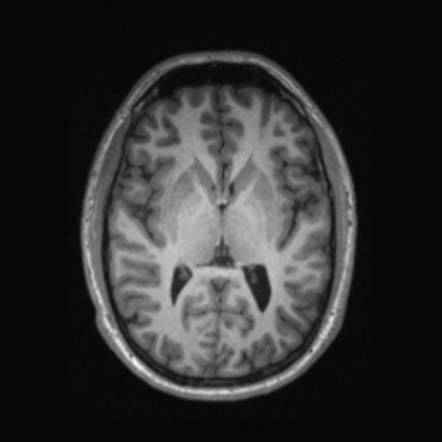

In [ ]:
display(img)

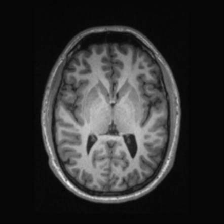

In [ ]:
img = image.load_img("N (1).jpg", target_size=(224, 224))
display(img)

In [ ]:
from numpy.lib.function_base import append
from keras.applications.vgg16 import preprocess_input
tumor_no=[]
tumor_yes=[]
target=[]
for i in range(98):
  img = image.load_img("N ("+str(i+1)+").jpg")
  img = image.load_img("N ("+str(i+1)+").jpg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  tumor_no.append(img)
  target.append(0)
for i in range(155):
  img = image.load_img("Y ("+str(i+1)+").jpg")
  img = image.load_img("Y ("+str(i+1)+").jpg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  tumor_yes.append(img)
  target.append(1)
All_data=[]
All_data=tumor_no+tumor_yes
# for i in range(252):
#   All_data.insert(i,target[i])
print(len(tumor_no))
print(len(tumor_yes))
All_data1=np.array(All_data)
target1=np.array(target)

98
155


In [ ]:
print(target1[98])

1


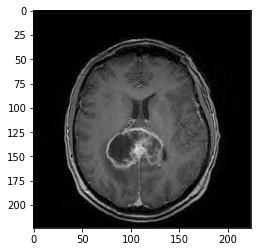

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(All_data1[252])

In [ ]:
from sklearn.utils import shuffle
All_data1, target1 = shuffle(All_data1, target1)

In [ ]:
print(target1[251])

1


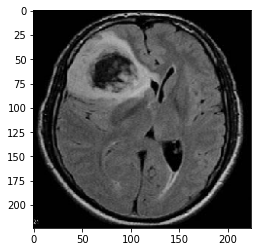

In [ ]:
plt.imshow(All_data1[251])

In [ ]:
#split train and test
train = All_data1[:-50]
test = All_data1[-50:]
train_lable = np.array(target1[:-50])
test_lable = np.array(target1[-50:])

In [ ]:
# for i in range(252):
#   All_data.insert(i,target[i])
# print(All_data[0])

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
import tensorflow as tf
keras.backend.clear_session()
modelVGG = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
# modelVGG.layers.pop()
modelVGG.trainable=False
model = Sequential()
model.add (modelVGG)
model.add (keras.layers.Flatten())
# keras.layers.Dropout(rate=0.1)

model.add (keras.layers.Dense(2,activation='relu'))
model.add (keras.layers.Dense(5, activation='relu'))
model.add (keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 14,764,887
Trainable params: 50,199
Non-trainable params: 14,714,688
_________________________________________________________________
None


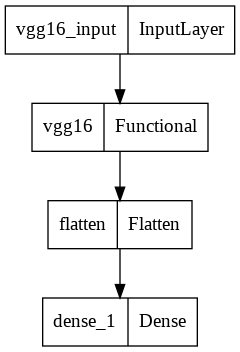

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

In [ ]:
model.layers[0].trainable=False

In [ ]:

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="presentOne",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=10)
model.fit(x=train, y=train_lable, epochs=5,batch_size=32,validation_data=(test,test_lable),callbacks=[checkpoint,EarlyStop])


Epoch 1/5
7/7 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.9409INFO:tensorflow:Assets written to: presentOne/assets


INFO:tensorflow:Assets written to: presentOne/assets


7/7 [==============================] - 4s 630ms/step - loss: 0.2932 - accuracy: 0.9409 - val_loss: 0.6646 - val_accuracy: 0.8200
Epoch 2/5
7/7 [==============================] - 1s 178ms/step - loss: 0.2867 - accuracy: 0.9557 - val_loss: 0.6932 - val_accuracy: 0.8200
Epoch 3/5
7/7 [==============================] - 1s 177ms/step - loss: 0.2865 - accuracy: 0.9606 - val_loss: 0.7842 - val_accuracy: 0.8200
Epoch 4/5
7/7 [==============================] - 1s 178ms/step - loss: 0.2747 - accuracy: 0.9606 - val_loss: 0.8330 - val_accuracy: 0.8000
Epoch 5/5
7/7 [==============================] - ETA: 0s - loss: 0.2579 - accuracy: 0.9852INFO:tensorflow:Assets written to: presentOne/assets


INFO:tensorflow:Assets written to: presentOne/assets


7/7 [==============================] - 4s 570ms/step - loss: 0.2579 - accuracy: 0.9852 - val_loss: 0.6831 - val_accuracy: 0.8400


# **Image augumentation**

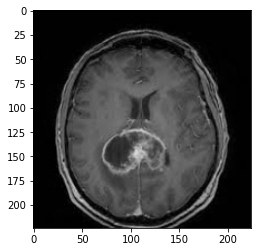

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread("Y (2).jpg")
plt.imshow(image)

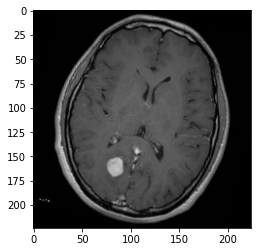

In [ ]:
import cv2
import glob
images=glob.glob("*.jpg")
for image_path in images:
  image=cv2.imread(image_path)
plt.imshow(image)
# cv2.imwrite('savedimage.png', image)    

In [ ]:
print(images[155])

N (1).jpg


In [ ]:
import imgaug.augmenters as iaa
# 2. Image Augmentation
# augmentation = iaa.Sequential([
augmentation = iaa.Fliplr(0.5)
# ])

In [ ]:
# 3. Show Images
augmented_images = augmentation(images=All_data1)

In [ ]:
#save images
#flip horizontally
i=0
for img in augmented_images:
  if i<=97:
    cv2.imwrite('N ('+str(i+99)+').jpg', img)
  else:
    cv2.imwrite('Y ('+str(i+58)+').jpg', img)
  i+=1


In [ ]:
#flip vertically
augmentation = iaa.Flipud(0.5)
augmented_images = augmentation(images=All_data1)
i=0
for img in augmented_images:
  if i<=97:
    cv2.imwrite('N ('+str(i+197)+').jpg', img)
  else:
    cv2.imwrite('Y ('+str(i+311)+').jpg', img)
  i+=1

In [ ]:
#rotate 30degrees to right
augmentation = iaa.Affine(rotate=(-30,30))
augmented_images = augmentation(images=All_data1)
i=0
for img in augmented_images:
  if i<=97:
    cv2.imwrite('N ('+str(i+295)+').jpg', img)
  else:
    cv2.imwrite('Y ('+str(i+564)+').jpg', img)
  i+=1

In [ ]:
#rotate 30degrees to left
augmentation = iaa.Affine(rotate=(-30,0))
augmented_images = augmentation(images=All_data1)
i=0
for img in augmented_images:
  if i<=97:
    cv2.imwrite('N ('+str(i+393)+').jpg', img)
  else:
    cv2.imwrite('Y ('+str(i+817)+').jpg', img)
  i+=1

In [ ]:
#darken images randomely
augmentation = iaa.Add((-40, -35))
augmented_images = augmentation(images=All_data1)
i=0
for img in augmented_images:
  if i<=97:
    cv2.imwrite('N ('+str(i+491)+').jpg', img)
  else:
    cv2.imwrite('Y ('+str(i+1070)+').jpg', img)
  i+=1

In [ ]:
#blur images
augmentation = iaa.GaussianBlur(sigma=(0.0, 5.0))
augmented_images = augmentation(images=All_data1)
i=0
for img in augmented_images:
  if i<=97:
    cv2.imwrite('N ('+str(i+589)+').jpg', img)
  else:
    cv2.imwrite('Y ('+str(i+1323)+').jpg', img)
  i+=1

In [ ]:
#brighten images
augmentation = iaa.MultiplyBrightness((1.2, 1.5))
augmented_images = augmentation(images=All_data1)
i=0
for img in augmented_images:
  if i<=97:
    cv2.imwrite('N ('+str(i+687)+').jpg', img)
  else:
    cv2.imwrite('Y ('+str(i+1576)+').jpg', img)
  i+=1

In [ ]:
#high contrast images
augmentation = iaa.GammaContrast((1.5, 2.0))
augmented_images = augmentation(images=All_data1)
i=0
for img in augmented_images:
  if i<=97:
    cv2.imwrite('N ('+str(i+785)+').jpg', img)
  else:
    cv2.imwrite('Y ('+str(i+1829)+').jpg', img)
  i+=1

In [ ]:
#high scale images
augmentation = iaa.Affine(scale=(1.1, 1.3))
augmented_images = augmentation(images=All_data1)
i=0
for img in augmented_images:
  if i<=97:
    cv2.imwrite('N ('+str(i+883)+').jpg', img)
  else:
    cv2.imwrite('Y ('+str(i+2082)+').jpg', img)
  i+=1

In [ ]:
#high scale images
augmentation = iaa.Affine(scale=(1.1, 1.3))
augmented_images = augmentation(images=All_data1)
i=0
for img in augmented_images:
  if i<=97:
    temp=0
  else:
    cv2.imwrite('Y ('+str(i+214)+').jpg', img)
  i+=1

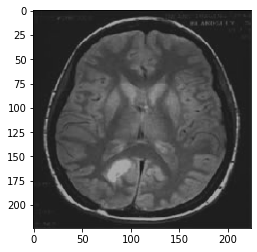

In [ ]:
plt.imshow(augmented_images[202])

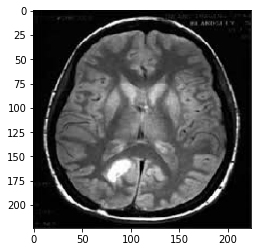

In [ ]:
plt.imshow(All_data1[202])

In [ ]:
from numpy.lib.function_base import append
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications import vgg16
tumor_no=[]
tumor_yes=[]
target=[]
for i in range(98,980):
  img = image.load_img("N ("+str(i+1)+").jpg")
  img = image.load_img("N ("+str(i+1)+").jpg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  tumor_no.append(img)
  target.append(0)
for i in range(155,1647):
  img = image.load_img("Y ("+str(i+1)+").jpg")
  img = image.load_img("Y ("+str(i+1)+").jpg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  tumor_yes.append(img)
  target.append(1)
train_new=[]
train_new=tumor_no+tumor_yes
# for i in range(252):
#   All_data.insert(i,target[i])
print(len(tumor_no))
print(len(tumor_yes))
train_new1=np.array(train_new)
target_new1=np.array(target)

882
1492


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
import tensorflow as tf
keras.backend.clear_session()
modelVGG = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
# modelVGG.layers.pop()
modelVGG.trainable=False
model = Sequential()
model.add (modelVGG)
model.add (keras.layers.Flatten())
# keras.layers.Dropout(rate=0.1)

model.add (keras.layers.Dense(2,activation='relu'))
model.add (keras.layers.Dense(5, activation='relu'))
model.add (keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

print(model.summary())

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 14,764,887
Trainable params: 50,199
Non-trainable params: 14,714,688
________________________________________

In [ ]:

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="presentOne",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=10)
model.fit(x=train_new1, y=target_new1, epochs=40,batch_size=1,validation_data=(test,test_lable),callbacks=[checkpoint,EarlyStop])


Epoch 1/40
2374/2374 [==============================] - 1276s 537ms/step - loss: 0.3260 - accuracy: 0.9061 - val_loss: 0.0322 - val_accuracy: 0.9800
Epoch 2/40
2374/2374 [==============================] - 1275s 537ms/step - loss: 0.1436 - accuracy: 0.9693 - val_loss: 0.0395 - val_accuracy: 0.9800
Epoch 3/40
2374/2374 [==============================] - 1272s 536ms/step - loss: 0.0785 - accuracy: 0.9869 - val_loss: 0.0596 - val_accuracy: 0.9800
Epoch 4/40
2374/2374 [==============================] - 1277s 538ms/step - loss: 0.0606 - accuracy: 0.9861 - val_loss: 0.0616 - val_accuracy: 0.9800
Epoch 5/40
2374/2374 [==============================] - 1274s 537ms/step - loss: 0.0290 - accuracy: 0.9954 - val_loss: 0.0695 - val_accuracy: 0.9800
Epoch 6/40
2374/2374 [==============================] - 1280s 539ms/step - loss: 0.0334 - accuracy: 0.9912 - val_loss: 0.0757 - val_accuracy: 0.9800
Epoch 7/40
2374/2374 [==============================] - 1284s 541ms/step - loss: 0.0154 - accuracy: 0.9983